## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [1]:
import pandas as pd
import re
import glob
import copy

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [2]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    
    root_dir = r"data_raw"
    return list(glob.glob(f'{root_dir}/*.xlsx'))
    

# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['data_raw/Python-QUIZ Sets (7 min)-grades.xlsx', 'data_raw/Python-QUIZ Iterations (6 min.)-grades.xlsx', 'data_raw/Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Lists (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Strings (5 min.)-grades.xlsx', 'data_raw/Python-QUIZ Functions (18 min.)-grades.xlsx', 'data_raw/Python-QUIZ Coercion (6 min.)-grades.xlsx', 'data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'data_raw/Python-QUIZ Tuples (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [3]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
    for file in files:
        if re.search(s, file): return file
    
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [4]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    file = Q2_function(files, s)
    return pd.read_excel(file,index_col=0)
    

# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
# print(functions_df)
functions_df.head(3)

,State,Started on,Completed,Time taken,Grade/45.00,Q. 1 /5.00,Q. 2 /10.00,Q. 3 /6.00,Q. 4 /6.00,Q. 5 /12.00,Q. 6 /6.00,id
0,Finished,February 5 2018 3:19 PM,February 5 2018 3:34 PM,14 mins 16 secs,32,5,6,6,3.00,12.00,0.00,0
1,Finished,February 4 2018 4:01 PM,February 4 2018 4:19 PM,17 mins 54 secs,31,5,8,6,-,12.00,0.00,1
12,Finished,February 6 2018 3:57 PM,February 6 2018 4:12 PM,15 mins 44 secs,20,3,4,3,-,10.00,0.00,12


### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [5]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    col_names = list(dataframe.columns)
    
    req_cols = ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
    df_subset = dataframe.loc[:,req_cols]
    
    return col_names, df_subset,dataframe.head(10)


# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [6]:

def calculate_sec(time_str):
    """
    :type : String
    :rtype: int
    """    
    hour_start, hour_end, min_start, min_end, sec_start, sec_end = -1, -1, -1, -1, -1, -1
    hours, mins, secs = 0, 0, 0
    
    hour_res = re.search("hours", time_str)
    if hour_res is None:
        hour_res = re.search("hour", time_str)

    if hour_res is not None:
        hour_start = hour_res.start()
        hour_end = hour_res.end()
    
    if not (hour_start == -1 and hour_end == -1):
        hours = int(time_str[0:hour_start - 1])

    
    min_res = re.search("mins", time_str)
    if min_res is None:
        min_res = re.search("min", time_str)

    if min_res is not None:
        min_start = min_res.start()
        min_end = min_res.end()
        
    if not (min_start == -1 and min_end == -1):
        mins = int(time_str[hour_end + 1:min_start - 1])
 

    sec_res = re.search("secs", time_str)
    if sec_res is None:
        sec_res = re.search("sec", time_str)

    if sec_res is not None:
        sec_start = sec_res.start()
        sec_end = sec_res.end()
    
    if not (sec_start == -1 and sec_end == -1):
        secs = int(time_str[min_end + 1:sec_start - 1])
        
    
    return ((hours * 3600) + (mins * 60) + secs)


def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    column_types = list(df.dtypes)
    
    columns = df.columns
#     print(df.head())
#     print("--------------------------------")
    for col in columns:
        # Removing Spaces in the Front
        df[col] = [re.sub("\A\s+", "", str(x)) for x in df[col]]
        
        # Removing Spaces in the end
        df[col] = [re.sub("\s+\Z", "", x) for x in df[col]]
        
    
#     print(df.head())
    col_name = "Time taken"
    if pd.isnull(df[col_name]).any():
        df[col_name].fillna(0, inplace = True)
    
    new_col = "time"
    df[new_col] = [calculate_sec(x) for x in df[col_name]]
    df.drop(col_name, inplace=True, axis=1)
    
#     
    return column_types, df


# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
[dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O')]

New Update DataFrame
    id Grade/45.00 Q. 1 /5.00 Q. 2 /10.00 Q. 3 /6.00 Q. 4 /6.00 Q. 5 /12.00  \
0    0          32          5           6          6       3.00       12.00   
1    1          31          5           8          6          -       12.00   
12  12          20          3           4          3          -       10.00   
2    2          30          5           6          6       3.00       10.00   
3    3          26          5           6          6       3.00        6.00   
4    4          25          5           6          6       6.00        2.00   
5    5          24          5           6          6       3.00        4.00   
6    6          23          5           6          0       0.00        6.00   
7    7          23          4           4          6       3.00        6.00   
8    8          22          4           4 

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [7]:
def replace_missing_data_mean(df, col_names):
    """
    :type : DataFrame, List[String]
    :rtype: DataFrame
    """
    for col in col_names:
        df[col] = pd.to_numeric(df[col], errors ='coerce')    
        df[col] = df[col].fillna(df[col].mean())
    return df
    
def get_mean_values(df, col_names):
    mean_df = pd.DataFrame(columns = col_names)
    for col in col_names:
        mean_df.loc[0, col] = float(df[col].mean().round(decimals=2))
    
    return mean_df
    

def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE
    df_new = df.copy()
    
    cols = list(df_new.columns)
    
    df_new = df_new.drop_duplicates()

    df_new = replace_missing_data_mean(df_new, cols)
    
    mean_df = get_mean_values(df_new, cols[1:])

    mean_df.loc[0, "id"] = int(df_new["id"].max())+1
    
    df_new = df_new.append(mean_df ,ignore_index=True)
    
    return df_new


# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

      id Grade/45.00 Q. 1 /5.00 Q. 2 /10.00 Q. 3 /6.00 Q. 4 /6.00 Q. 5 /12.00  \
0    0.0          32          5           6          6          3          12   
1    1.0          31          5           8          6          2          12   
2   12.0          20          3           4          3          2          10   
3    2.0          30          5           6          6          3          10   
4    3.0          26          5           6          6          3           6   
5    4.0          25          5           6          6          6           2   
6    5.0          24          5           6          6          3           4   
7    6.0          23          5           6          0          0           6   
8    7.0          23          4           4          6          3           6   
9    8.0          22          4           4          6          0           8   
10   9.0          22          5           8          6          3        5.75   
11  10.0          21        

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [8]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    filenames = Q1_function()
    exceptions_df = Q3_function(filenames, file)
    column = exceptions_df["Grade/21.00"]
    return round(column.mean(),2),round(column.std(),2), round(column.quantile(.25),2), round(column.quantile(.50),2), round(column.quantile(.75),2), round(column.max(),2), round(column.min(),2)
    
    

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

<AxesSubplot:>

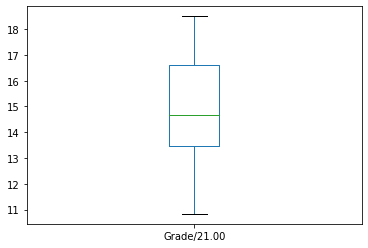

In [9]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [10]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    filenames = Q1_function()
    strings_df = Q3_function(filenames, file)
    
    return strings_df.shape
    


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [11]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    # TYPE YOUR CODE HERE
    col_name = "Q. 5 /12.00"
    
    #Replace all missing values
    df[col_name]= pd.to_numeric(df[col_name], errors ='coerce')    
    df[col_name] = df[col_name].fillna(0)
    
    df["id"]= pd.to_numeric(df["id"], errors ='coerce') 
    
    zero = list(df.groupby([col_name]).get_group(0)["id"])
    maximum = df.groupby([col_name]).get_group(df[col_name].max()).count()['id']
   
    return zero,maximum


# Call the function and print the results
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [12]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    
    filenames = Q1_function()
    
    tuples_df = Q3_function(filenames, "Tuples")
    taxonomy_df = Q3_function(filenames, "Taxonomy")
    
    tuples_df = Q5_function(tuples_df)[1]
    taxonomy_df = Q5_function(taxonomy_df)[1]

    merged_df = pd.merge(tuples_df, taxonomy_df, on="id")
    merged_df["Grade/20.00"] = pd.to_numeric(merged_df["Grade/20.00"])
    merged_df["Grade/21.00"] = pd.to_numeric(merged_df["Grade/21.00"])

    merged_df["Total_score"] = merged_df["Grade/20.00"] + merged_df["Grade/21.00"]
   
    merged_df["id"]= pd.to_numeric(merged_df["id"], errors ='coerce') 
    idMax = merged_df.loc[merged_df['Total_score'].idxmax()]['id']

    return merged_df, idMax


# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [13]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
    return list(df[(df["time_x"]+ df["time_y"])<1200]["id"].astype(int).sort_values())
    


# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* _Don't consider 'Overall Average' row._

In [14]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    # Dropping Mean Row
    df = df.drop(len(df)-1)
    df['bins'] = pd.cut(x=df['Grade/45.00'], bins=[12, 16, 20, 24, 28, 32])
    
    return df.groupby("bins").size().reset_index(name='count')


# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

       bins  count
0  (12, 16]      4
1  (16, 20]      3
2  (20, 24]      7
3  (24, 28]      2
4  (28, 32]      3


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [15]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_Q01_function(self):
        ans = ['data_raw/Python-QUIZ Sets (7 min)-grades.xlsx', 
               'data_raw/Python-QUIZ Iterations (6 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Exceptions (10 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Lists (10 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Strings (5 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Functions (18 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Coercion (6 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Conditionals (6 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Tuples (10 min.)-grades.xlsx', 
               'data_raw/Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx']
        
        result=Q1_function()
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result)

    
    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])
        
        
    def test_Q03_function(self):
        
        ans = pd.DataFrame([["Finished","February 5 2018  3:19 PM", "February 5 2018  3:34 PM", "14 mins 16 secs", 32, 5, 6, 6, "3.00", "12.00", "0.00", 0]]
                  , columns = ['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00',
       'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00',
       'Q. 6 /6.00', 'id'])

        result=Q3_function(filenames, s = "Functions").head(1) 
        
        #Handling removal of the path to check only filename
        pd.testing.assert_frame_equal(ans,result)

        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
        
    def test_Q05_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
      
    def test_Q06_function(self):
        
        test_df = pd.DataFrame([[0, "31", 5, 8, 6, '-', "12.00", "0.00", 1074],[1, "30", 5, 6, 6, '3.00', "10.00", "-", 1080]],columns = ["id","Grade/45.00","Q.1/5.00","Q.2/10.00","Q.3/6.00","Q.4/6.00","Q.5/12.00","Q.6/6.00","time"])        
        ans = pd.DataFrame([[0.0, 31, 5, 8, 6,3, 12.00, 0.00, 1074],[1.0, 30, 5, 6, 6, 3, 10, 0, 1080],[2.0, 30.5, 5.0, 7.0, 6.0, 3.0, 11.0, 0.0, 1077.0]],columns = ["id","Grade/45.00","Q.1/5.00","Q.2/10.00","Q.3/6.00","Q.4/6.00","Q.5/12.00","Q.6/6.00","time"])
        
        result = Q6_function(test_df)  
        
        pd.testing.assert_frame_equal(ans, result)
    
    
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        
        self.assertEqual(ans, result)

    def test_Q09_function(self):
        
        ans1 = 17
        ans2 =  7
        
        result1, result2 = Q9_function(file='Strings')
        
        self.assertEqual(ans1, result1)
        self.assertEqual(ans2, result2)
    
    def test_Q10_function(self):
        
        ans1 = [9,10,13,17,18]
        ans2 = 2
        
        result1, result2 = Q10_function(Q5_df)
        
        self.assertEqual(ans1, result1)
        self.assertEqual(ans2, result2)
        
    def test_Q11_function(self):
        
        ans = 10
        df, result = Q11_function()
        
        self.assertEqual(ans, result)
        
    def test_Q12_function(self):
        
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        
        # buckets = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        result = list(Q13_function(Q6_df)['count'])
        ans = [4, 3, 7, 2, 3]
        
        self.assertEqual(ans, result)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... /home/mukunda/.local/lib/python3.8/site-packages/xlrd/xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
/home/mukunda/.local/lib/python3.8/site-packages/xlrd/xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__main__.TestNotebook) ... FAIL
test_Q07_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_function (__ma